In [4]:
import time
import random
import glob
import os
import sys
import numpy as np

try:
    sys.path.append(glob.glob('../carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla

In [5]:
client = carla.Client('localhost', 2000)
client.set_timeout(5.0)
world = client.get_world()
world = client.load_world('Town05')
blueprint_library = world.get_blueprint_library()

In [6]:
bp = blueprint_library.filter("model3")[0]
spawn_point = random.choice(world.get_map().get_spawn_points())
model3 = world.spawn_actor(bp, spawn_point)

In [7]:
location = model3.get_location()
print('current location: {}'.format(location))
location.x += 3
model3.set_location(location)
print('moved vehicle to location: {}'.format(location))

current location: Location(x=-54.909966, y=-77.222336, z=0.050347)
moved vehicle to location: Location(x=-51.909966, y=-77.222336, z=0.050347)


In [8]:
model3.set_autopilot()

In [9]:
import time
for i in range(10):
    print(model3.get_location())
    time.sleep(1)

Location(x=-51.909206, y=-77.222649, z=0.052164)
Location(x=-51.606541, y=-75.031624, z=0.055362)
Location(x=-51.033733, y=-70.513496, z=0.057083)
Location(x=-50.850761, y=-65.652336, z=0.057096)
Location(x=-50.871655, y=-60.774872, z=0.057093)
Location(x=-50.941109, y=-55.895325, z=0.057095)
Location(x=-51.000092, y=-51.005497, z=0.057101)
Location(x=-51.031422, y=-46.133743, z=0.057100)
Location(x=-51.037045, y=-41.255196, z=0.057097)
Location(x=-51.025593, y=-36.393524, z=0.057106)


In [10]:
camera_bp = blueprint_library.find('sensor.camera.rgb')
camera_transform = carla.Transform(carla.Location(x=1.5, z=2.4))
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=model3)
camera.listen(lambda image: image.save_to_disk('model3/%06d.png' % image.frame))

In [11]:
camera.stop()

In [14]:
images = glob.glob('model3/*.png')
print(len(images))

11


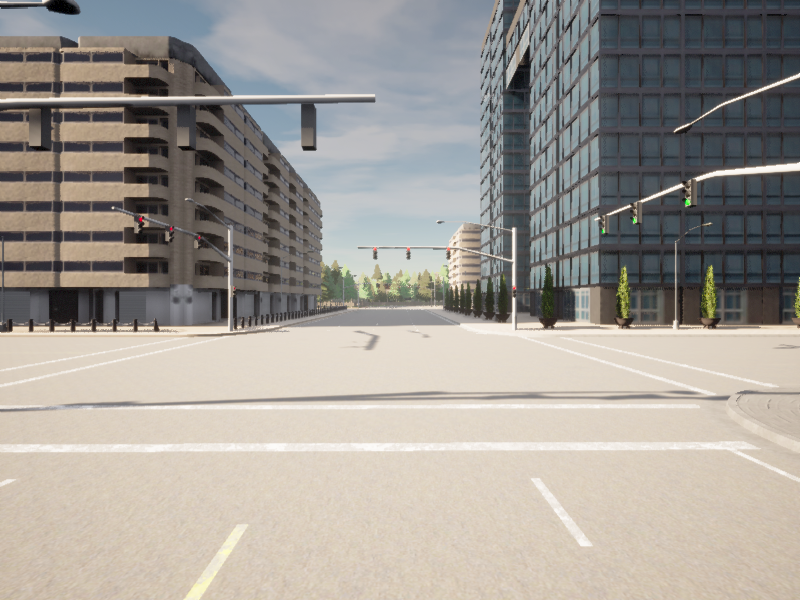

In [15]:
from IPython.display import Image
Image(filename=images[random.randint(0, len(images))]) 

In [ ]:
camera.destroy()
model3.destroy()